In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Visualize the number of stores in each city. Identify the city with the most stores and explain the distribution of stores across other cities. How does the number of stores in Bengaluru compare with those in Hyderabad and Chennai? (Hint: Use a bar chart to visualize the number of stores by city)

In [2]:
df_stores = pd.read_csv("dim_stores.csv")

In [3]:
df_stores.duplicated().sum()

0

In [4]:
df_stores.head()

,store_id,city
0,STTRV-0,Trivandrum
1,STMDU-3,Madurai
2,STHYD-6,Hyderabad
3,STVSK-1,Visakhapatnam
4,STCBE-3,Coimbatore


In [5]:
city_store_total = df_stores.groupby("city")["store_id"].count().reset_index()

In [6]:
city_store_total

,city,store_id
0,Bengaluru,10
1,Chennai,8
2,Coimbatore,5
3,Hyderabad,7
4,Madurai,4
5,Mangalore,3
6,Mysuru,4
7,Trivandrum,2
8,Vijayawada,2
9,Visakhapatnam,5


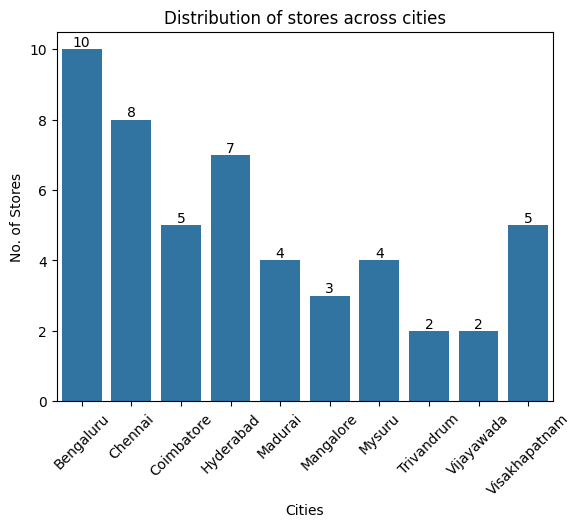

In [7]:
ax = sns.barplot(x="city", y="store_id", data=city_store_total)

plt.title("Distribution of stores across cities")
plt.xlabel("Cities")
plt.ylabel("No. of Stores")
plt.xticks(rotation=45)

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')  # %d makes sure numbers are integers

plt.show()

### Key Insights from Store Distribution Across Cities

- **Bengaluru has the highest number of stores (10)**, indicating a strong presence in this city.  
- **Chennai (8) and Hyderabad (7)** follow as the next major hubs for store concentration.  
- **Coimbatore and Visakhapatnam have 5 stores each**, forming the mid-tier group.  
- **Madurai (4), Mysuru (4), and Mangalore (3)** represent smaller markets.  
- **Trivandrum and Vijayawada have the least number of stores (2 each)**, showing minimal presence.  
- Overall, **store distribution is skewed towards metropolitan cities** like Bengaluru, Chennai, and Hyderabad, while tier-2 cities show relatively lower store counts.  


### 2. Analyze the total quantity sold after promotion for the Sankranti campaign across different product categories. What percentage does each category contribute to the overall sales, and what insights can be drawn from these contributions? (Hint: Use a pie chart to visualize percentage contribution of each category to the overall sales)

In [8]:
df_events = pd.read_csv("fact_events.csv")

In [9]:
df_events.duplicated().sum()

10

In [10]:
df_events = df_events.drop_duplicates()

In [11]:
df_events.shape

(1500, 9)

In [12]:
df_events.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272


In [13]:
df_products = pd.read_csv("dim_products.csv")

In [14]:
df_products.head()

,product_code,product_name,category
0,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples
1,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
2,P03,Atliq_Suflower_Oil (1L),Grocery & Staples
3,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
4,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care


In [15]:
df_new = pd.merge(df_events, df_products, on="product_code")

In [16]:
df_campaigns = pd.read_csv("dim_campaigns.csv")

In [17]:
df_new = pd.merge(df_new, df_campaigns, on="campaign_id")

In [18]:
df_new.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12/11/2023,18-11-2023
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10/1/2024,16-01-2024
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12/11/2023,18-11-2023
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12/11/2023,18-11-2023
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10/1/2024,16-01-2024


In [19]:
sankranti_campaign = df_new[df_new["campaign_name"]=="Sankranti"].groupby("category")["quantity_sold(after_promo)"].sum().reset_index()

In [20]:
sankranti_campaign

,category,quantity_sold(after_promo)
0,Combo1,12411
1,Grocery & Staples,177724
2,Home Appliances,35610
3,Home Care,16894
4,Personal Care,9430


In [21]:
sankranti_campaign["percentage_quantity_sold(after_promo)"] = (sankranti_campaign["quantity_sold(after_promo)"]/
sankranti_campaign["quantity_sold(after_promo)"].sum())*100

In [22]:
sankranti_campaign

,category,quantity_sold(after_promo),percentage_quantity_sold(after_promo)
0,Combo1,12411,4.923652
1,Grocery & Staples,177724,70.506092
2,Home Appliances,35610,14.127084
3,Home Care,16894,6.702133
4,Personal Care,9430,3.741039


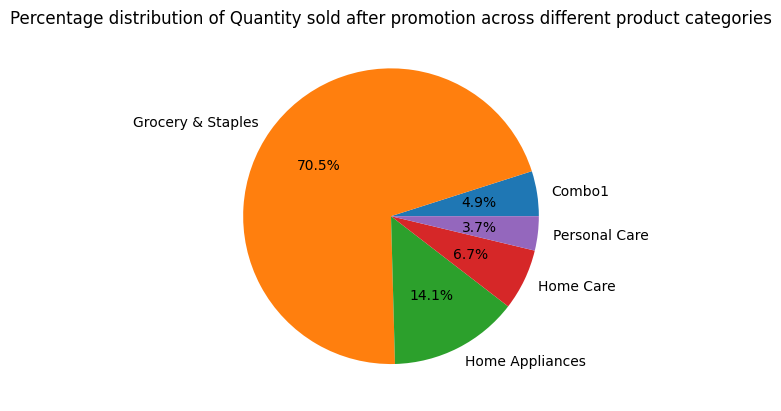

In [70]:
plt.pie( sankranti_campaign["percentage_quantity_sold(after_promo)"], labels=sankranti_campaign["category"], autopct="%1.1f%%" )
plt.title("Percentage distribution of Quantity sold after promotion across different product categories")
plt.show() 

### Key Insights from Sales Distribution

- **Grocery & Staples contributes the highest share** to overall sales (**70.5%**).  
- **Home Appliances ranks second** with **14.1%**, but far behind Grocery.  
- **Home Care contributes 6.7%**, making it the third-largest category.  
- **Combo1 (4.9%) and Personal Care (3.7%)** have the lowest shares, showing limited sales impact.  
- The sales distribution is **highly concentrated**, with Grocery alone accounting for more than all other categories combined.  
- **Top two categories (Grocery & Home Appliances)** together make up nearly **85%** of total sales.  


### 3. Examine the correlation between base price (after the promotion) and sales quantities (after the promotion). What insights can be drawn regarding the relationship between base price and sales quantities after the promotion? (Hint: Use heatmap to get the correlation)

In [24]:
df_new.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12/11/2023,18-11-2023
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10/1/2024,16-01-2024
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12/11/2023,18-11-2023
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12/11/2023,18-11-2023
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10/1/2024,16-01-2024


In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   event_id                     1500 non-null   object 
 1   store_id                     1500 non-null   object 
 2   campaign_id                  1500 non-null   object 
 3   product_code                 1500 non-null   object 
 4   base_price(before_promo)     1500 non-null   int64  
 5   quantity_sold(before_promo)  1480 non-null   float64
 6   promo_type                   1500 non-null   object 
 7   base_price(after_promo)      1500 non-null   int64  
 8   quantity_sold(after_promo)   1500 non-null   int64  
 9   product_name                 1500 non-null   object 
 10  category                     1500 non-null   object 
 11  campaign_name                1500 non-null   object 
 12  start_date                   1500 non-null   object 
 13  end_date          

In [26]:
numerical_columns = [col for col in df_new.columns if df_new[col].dtype in ["int64", "float64"]]

In [27]:
numerical_columns

['base_price(before_promo)',
 'quantity_sold(before_promo)',
 'base_price(after_promo)',
 'quantity_sold(after_promo)']

In [28]:
corr = df_new[numerical_columns].corr()

In [29]:
corr

,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo)
base_price(before_promo),1.000000,0.170073,0.982047,0.266130
quantity_sold(before_promo),0.170073,1.000000,0.203835,0.782597
base_price(after_promo),0.982047,0.203835,1.000000,0.269404
quantity_sold(after_promo),0.266130,0.782597,0.269404,1.000000


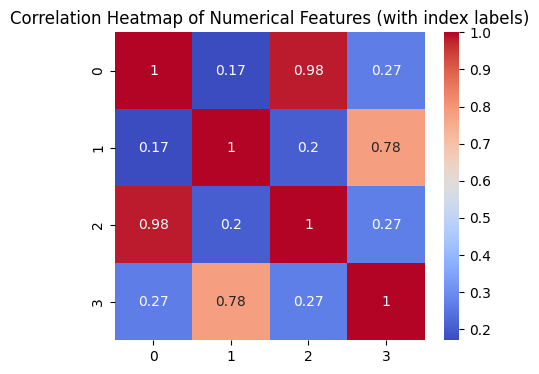

Index Mapping:
 Index             Original Column
     0    base_price(before_promo)
     1 quantity_sold(before_promo)
     2     base_price(after_promo)
     3  quantity_sold(after_promo)


In [79]:
col_mapping = {i: col for i, col in enumerate(corr.columns)}

# Rename columns and index of corr matrix
corr_short = corr.copy()
corr_short.columns = range(len(corr.columns))
corr_short.index = range(len(corr.index))

# Plot smaller heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr_short, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features (with index labels)")
plt.show()

# Show mapping without DataFrame index
mapping_df = pd.DataFrame(list(col_mapping.items()), columns=["Index", "Original Column"])
mapping_df = mapping_df.reset_index(drop=True)   # drop extra index
print("Index Mapping:")
print(mapping_df.to_string(index=False))

### Insights on Correlation Between Base Price (After Promotion) and Sales Quantities (After Promotion)

- The correlation value between **base_price(after_promo)** and **quantity_sold(after_promo)** is **0.27**.  
- This indicates a **weak positive relationship**: as price increases, sales quantity also increases slightly.  
- The relationship is not strong, meaning **price alone is not a major driver of sales after promotions**.  
- Promotions and other factors likely have a **greater influence** on sales than the base price itself.  


### 4. Analyze the distribution of quantity sold before the promotion for each product category (Grocery & Staples, Home Care, Personal Care, Home Appliances,etc.). What patterns or trends do you observe across these categories, and how could these insights inform future promotional strategies?(Hint: Use individual histograms to visualize the distribution)

In [31]:
quantity_sold_before = df_new[["category", "quantity_sold(before_promo)"]]

In [32]:
quantity_sold_before.head()

,category,quantity_sold(before_promo)
0,Grocery & Staples,327.0
1,Grocery & Staples,379.0
2,Grocery & Staples,337.0
3,Home Care,122.0
4,Combo1,122.0


In [33]:
quantity_sold_before["category"].nunique()

5

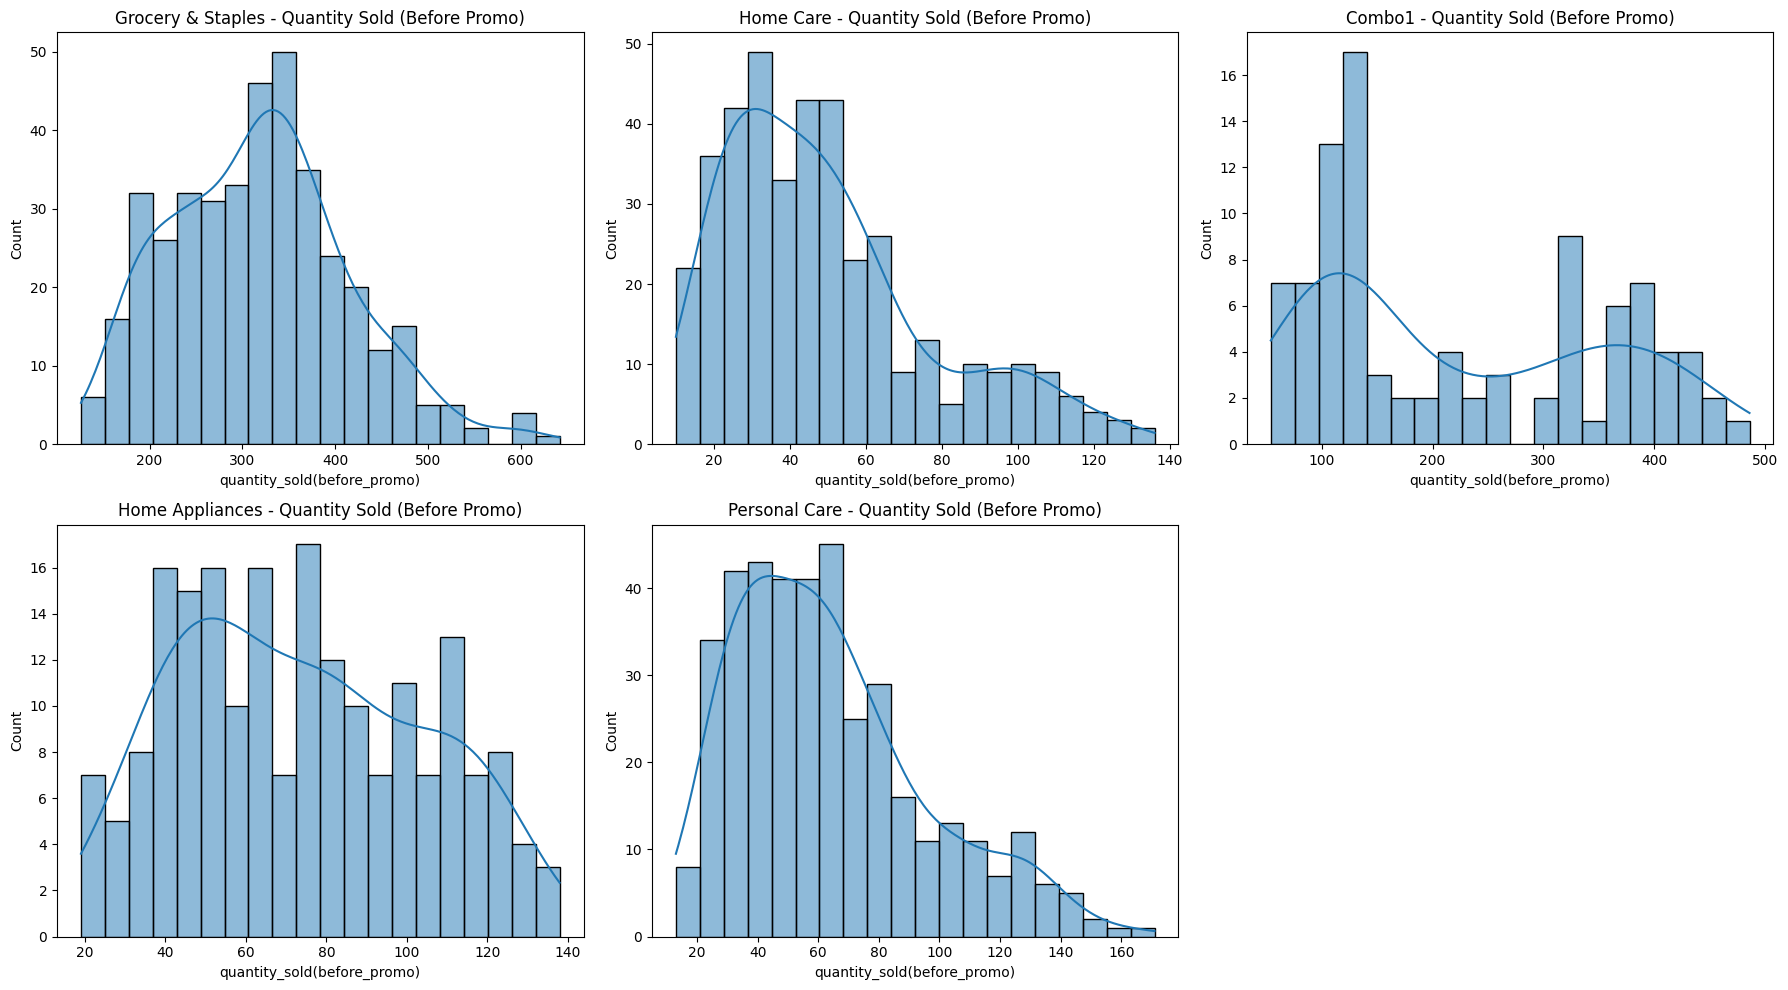

In [34]:
import math

categories = quantity_sold_before["category"].unique()
n_cats = len(categories)

# define grid shape (2 rows, 3 cols for 5 categories)
rows = math.ceil(n_cats / 3)
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, category in enumerate(categories):
    sns.histplot(
        data=quantity_sold_before[quantity_sold_before["category"] == category],
        x="quantity_sold(before_promo)",
        bins=20,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(f"{category} - Quantity Sold (Before Promo)")

# remove empty subplots if n_cats < rows*cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Insights on Quantity Sold (Before Promotion) by Category  

- **Grocery & Staples**: Strong baseline demand (centered 250–400). Promotions may add incremental gains.  
- **Home Care**: Lower baseline demand (20–60). Promotions can drive **high volume uplift**.  
- **Personal Care**: Moderate steady demand (30–70). Promotions useful for **shifting demand upward**.  
- **Home Appliances**: Wide spread, variable demand. Promotions should focus on **high-value items**.  
- **Combo1 (Bundles)**: Bimodal demand (low 80–150, high 300–400). Promotions must be **bundle-specific**.  


### Recommended Promotions by Category (Based on Histogram Insights)

- **Grocery & Staples**  
  - **Best Promotions:** 25% OFF, 33% OFF  
  - **Logic:** Already high baseline demand (250–400). Small % discounts encourage incremental sales and loyalty. Avoid deep discounts/BOGOF to prevent unnecessary revenue loss.  

- **Home Care**  
  - **Best Promotions:** BOGOF, 50% OFF  
  - **Logic:** Low baseline demand (20–60). Stronger promotions can push volume, attract new buyers, and encourage stock-up behavior.  

- **Combo1 (Bundles)**  
  - **Best Promotions:** BOGOF (for small buyers), 33% OFF or 50% OFF (for bulk buyers)  
  - **Logic:** Bimodal demand (low 80–150, high 300–400). Promotions should be **bundle-specific**: smaller buyers respond to free items, bulk buyers prefer deeper discounts.  

- **Home Appliances**  
  - **Best Promotions:** 500 Cashback, selective 50% OFF (on slow movers)  
  - **Logic:** Wide demand spread, high-value products. Cashback reduces psychological cost while protecting brand value. Deep % discounts only for clearance.  

- **Personal Care**  
  - **Best Promotions:** 25% OFF, 33% OFF, 500 Cashback (for premium items)  
  - **Logic:** Moderate steady demand (30–70). Medium discounts are effective for price-sensitive buyers; cashback works well for premium products while maintaining invoice value.  


### 5. Analyze the incremental sold units percentage (ISU%) across various cities. Identify the city with the highest ISU% after the promotion and the city with the smallest change. What trends can be observed about the effectiveness of promotions in driving sales across these cities? (Hint: Use a line chart to visualize the ISU% comparison across cities)

In [35]:
df_new.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12/11/2023,18-11-2023
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10/1/2024,16-01-2024
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12/11/2023,18-11-2023
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12/11/2023,18-11-2023
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10/1/2024,16-01-2024


In [36]:
df_cities = pd.read_csv("dim_stores.csv")

In [37]:
df_new = pd.merge(df_new, df_stores, on="store_id")

In [38]:
df_new.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date,city
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12/11/2023,18-11-2023,Chennai
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10/1/2024,16-01-2024,Chennai
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12/11/2023,18-11-2023,Bengaluru
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12/11/2023,18-11-2023,Bengaluru
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10/1/2024,16-01-2024,Hyderabad


In [39]:
cities_isu = df_new.groupby("city")[["quantity_sold(before_promo)", "quantity_sold(after_promo)"]].sum().reset_index()

In [40]:
cities_isu["ISU%"] = 100*((cities_isu["quantity_sold(after_promo)"] - cities_isu["quantity_sold(before_promo)"]) 
/ cities_isu["quantity_sold(before_promo)"])  

In [41]:
cities_isu.head()

,city,quantity_sold(before_promo),quantity_sold(after_promo),ISU%
0,Bengaluru,48894.0,105141,115.038655
1,Chennai,38949.0,83273,113.800098
2,Coimbatore,18122.0,38900,114.656219
3,Hyderabad,34179.0,69399,103.045730
4,Madurai,13774.0,31169,126.288660


In [42]:
max_row = cities_isu.loc[cities_isu["ISU%"].idxmax()]

city_max = max_row["city"]
isu_max_percent = max_row["ISU%"]

print(city_max, isu_max_percent)


Madurai 126.28865979381443


In [43]:
# Get the row with max ISU%
max_row = cities_isu.loc[cities_isu["ISU%"].idxmin()]

city_max = max_row["city"]
isu_max_percent = max_row["ISU%"]

print(city_max, isu_max_percent)


Visakhapatnam 101.84490864726537


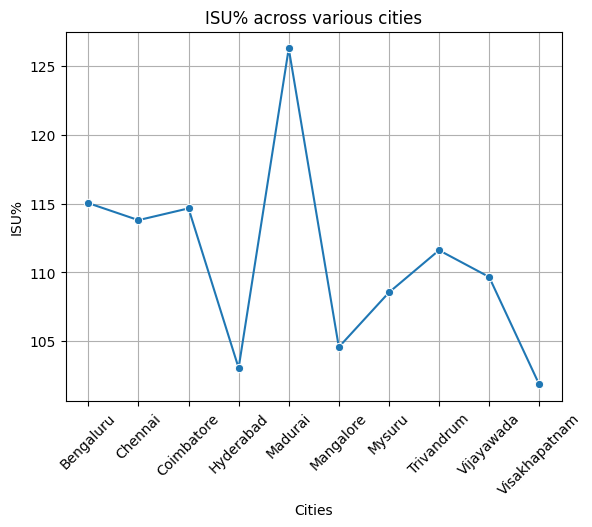

In [44]:
sns.lineplot(x="city", y = "ISU%", data=cities_isu,marker="o")
plt.xticks(rotation = 45)
plt.xlabel("Cities")
plt.grid()
plt.title("ISU% across various cities")
plt.show()

### Insights on Incremental Sold Units % (ISU%) Across Cities

- **Highest ISU%:**  
  - **Madurai (~127%)** recorded the highest ISU%.  
  - Promotions were **highly effective** here, indicating strong customer responsiveness to discounts and offers.  

- **Lowest ISU% (Smallest Change):**  
  - **Visakhapatnam (~102%)** had the smallest increase.  
  - Promotions had **minimal impact** in this market, possibly due to lower demand elasticity, weaker execution, or market saturation.  

---

### Trends Observed
- **Tier-2/3 cities (e.g., Madurai)** → Strong response to promotions due to higher price sensitivity.  
- **Metro cities (e.g., Bengaluru, Chennai, Hyderabad)** → Moderate uplift (~110–115%); promotions help, but baseline demand is already strong.  
- **Low-response cities (Visakhapatnam, Mangalore)** → Limited effectiveness; promotions alone may not drive sales.  

---

### Strategic Implications
- Apply **aggressive promotions** in high-response cities (e.g., Madurai) to maximize ROI.  
- In **metro cities**, prefer **targeted offers (loyalty rewards, bundling)** instead of deep discounts.  
- For **low-response cities**, focus on **non-price factors** like better visibility, distribution, or localized campaigns.  


### 6. Analyze the relationship between incremental revenue and incremental sold units for different promotion types in Hyderabad. Which promotion type led to the highest incremental sold units, and which one generated the highest incremental revenue? What insights can you draw from the balance between the two metrics for this city?(Hint: Use a scatter plot to analyze the relationship)

In [45]:
df_new["IR"] = (df_new["quantity_sold(after_promo)"]*df_new["base_price(after_promo)"]) - (df_new["quantity_sold(before_promo)"]*df_new["base_price(before_promo)"])

In [46]:
df_new["ISU"] = df_new["quantity_sold(after_promo)"] - df_new["quantity_sold(before_promo)"]

In [47]:
df_new.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date,city,IR,ISU
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12/11/2023,18-11-2023,Chennai,-32551.0,-40.0
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10/1/2024,16-01-2024,Chennai,159840.0,1243.0
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12/11/2023,18-11-2023,Bengaluru,-8732.0,151.0
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12/11/2023,18-11-2023,Bengaluru,-2323.0,-15.0
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10/1/2024,16-01-2024,Hyderabad,314000.0,150.0


In [48]:
promo_type_isu_ir_hyd = df_new[df_new["city"]=="Hyderabad"].groupby("promo_type")[["IR", "ISU"]].sum().reset_index()

In [49]:
promo_type_isu_ir_hyd.head()

,promo_type,IR,ISU
0,25% OFF,-537943.0,-940.0
1,33% OFF,-179239.0,4700.0
2,50% OFF,-115322.0,1291.0
3,500 Cashback,12866500.0,5845.0
4,BOGOF,3110320.0,23624.0


In [50]:
max_ir, promo_max_ir = promo_type_isu_ir_hyd.loc[promo_type_isu_ir_hyd["IR"].idxmax()]["IR"],promo_type_isu_ir_hyd.loc[promo_type_isu_ir_hyd["IR"].idxmax()]["promo_type"]

In [51]:
max_isu, promo_max_isu = promo_type_isu_ir_hyd.loc[promo_type_isu_ir_hyd["ISU"].idxmax()]["ISU"],promo_type_isu_ir_hyd.loc[promo_type_isu_ir_hyd["ISU"].idxmax()]["promo_type"]

In [52]:
print(max_ir, promo_max_ir )

12866500.0 500 Cashback


In [53]:
print(max_isu, promo_max_isu)

23624.0 BOGOF


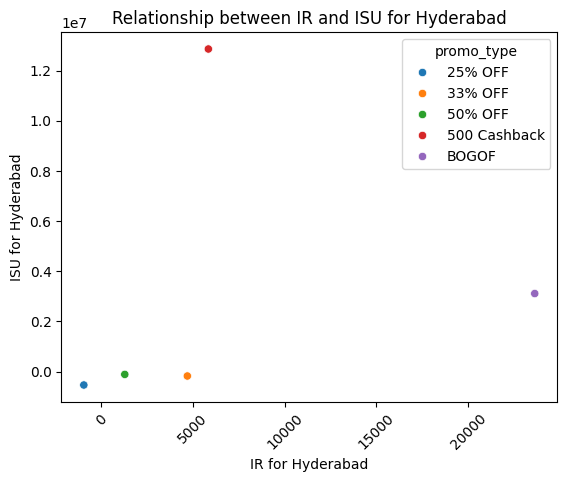

In [54]:
sns.scatterplot(x= "ISU", y= "IR", data = promo_type_isu_ir_hyd, marker = "o", hue="promo_type")
plt.xlabel("IR for Hyderabad")
plt.xticks(rotation = 45)
plt.ylabel("ISU for Hyderabad")
plt.title("Relationship between IR and ISU for Hyderabad")
plt.show()

### Insights on Incremental Revenue (IR) vs Incremental Sold Units (ISU) – Hyderabad

- **Highest Incremental Sold Units (ISU):**  
  - **500 Cashback** drove the largest ISU.  
  - Customers responded strongly in terms of **volume uplift**, as cashback incentivized higher purchases.  

- **Highest Incremental Revenue (IR):**  
  - **BOGOF** generated the highest IR.  
  - While unit growth was lower than Cashback, it delivered stronger **revenue gains**.  

---

### Balance Between IR and ISU
- **500 Cashback** → Best for **pushing sales volume**, but less effective for immediate revenue growth.  
- **BOGOF** → Best for **maximizing revenue uplift**, though with smaller unit growth compared to Cashback.  
- **Percentage discounts (25%, 33%, 50%)** → Cluster near the origin, showing **limited impact** in Hyderabad.  

---

### Strategic Implications
- For **market penetration & customer acquisition** → Prioritize **500 Cashback**.  
- For **profitability & revenue growth** → Focus on **BOGOF**.  
- Reconsider heavy reliance on simple % discounts in Hyderabad, as their impact is minimal compared to Cashback and BOGOF.  


### 7. Analyze the revenue before and after promotions across different product categories in Bengaluru. What trends can be identified in the performance of each category, and how did promotions impact overall revenue in the city? (Hint: Use a vertical bar chart to compare the revenue before and after promotions)

In [55]:
df_new["revenue_before"] = df_new["quantity_sold(before_promo)"]*df_new["base_price(before_promo)"]
df_new["revenue_after"] = df_new["quantity_sold(after_promo)"]*df_new["base_price(after_promo)"]

In [56]:
df_new.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date,city,IR,ISU,revenue_before,revenue_after
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12/11/2023,18-11-2023,Chennai,-32551.0,-40.0,94830.0,62279
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10/1/2024,16-01-2024,Chennai,159840.0,1243.0,140230.0,300070
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12/11/2023,18-11-2023,Bengaluru,-8732.0,151.0,289820.0,281088
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12/11/2023,18-11-2023,Bengaluru,-2323.0,-15.0,6710.0,4387
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10/1/2024,16-01-2024,Hyderabad,314000.0,150.0,366000.0,680000


In [57]:
bgl_category_revenue = df_new[df_new["city"]=="Bengaluru"].groupby("category")[["revenue_before", "revenue_after", "IR"]].sum()

In [58]:
bgl_category_revenue["IR%"] = 100*(bgl_category_revenue["IR"] / bgl_category_revenue["revenue_before"])

In [59]:
bgl_category_revenue

,revenue_before,revenue_after,IR,IR%
category,,,,
Combo1,15777000.0,38125000,22348000.0,141.649236
Grocery & Staples,12249044.0,13861259,1567710.0,12.798631
Home Appliances,2188810.0,4122680,1933870.0,88.352575
Home Care,2104460.0,3180020,1075560.0,51.108598
Personal Care,576321.0,389629,-186692.0,-32.393753


In [60]:
total_ir = bgl_category_revenue["IR"].sum()

In [61]:
total_ir

26738448.0

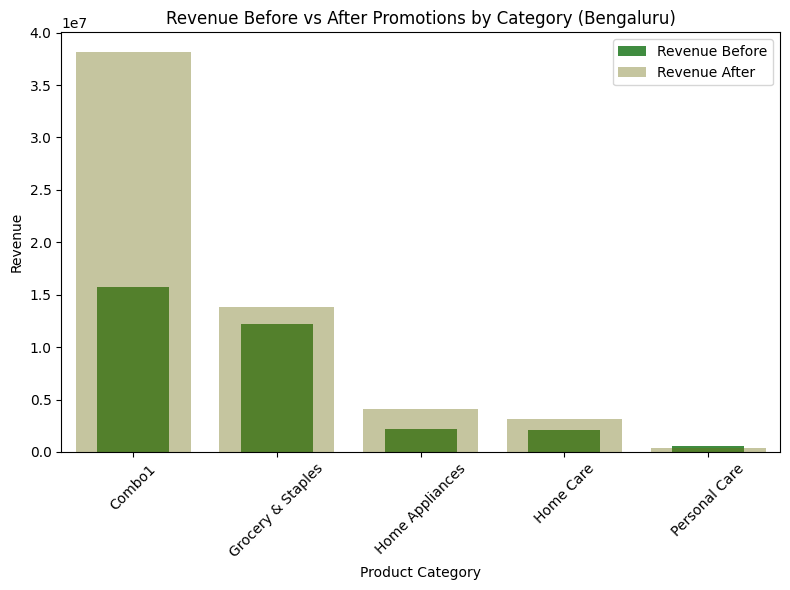

In [62]:

bgl_category_revenue_reset = bgl_category_revenue.reset_index()

plt.figure(figsize=(8,6))

# Plot before revenue
sns.barplot(
    x="category",
    y="revenue_before",
    data=bgl_category_revenue_reset,
    color="green",
    label="Revenue Before",
    width = 0.5,
    alpha = 0.8
)

# Plot after revenue (overlapping)
sns.barplot(
    x="category",
    y="revenue_after",
    data=bgl_category_revenue_reset,
    color="olive",
    alpha=0.4,
    label="Revenue After"
)

plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.title("Revenue Before vs After Promotions by Category (Bengaluru)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Insights on Revenue Before vs After Promotions – Bengaluru

- **Highest Revenue Growth (Absolute):**  
  - **Combo1 (Bundles)** showed the largest revenue increase after promotions.  
  - Promotions nearly doubled the revenue, proving bundled offers are highly effective.  

- **Strong Baseline Performer:**  
  - **Grocery & Staples** had consistently high revenue even before promotions.  
  - Promotions delivered moderate uplift, supporting steady demand.  

---

### Balance Between Categories
- **Combo1 (Bundles)** → Biggest contributor to overall revenue uplift in Bengaluru.  
- **Grocery & Staples** → Stable revenue stream; promotions add incremental gains.  
- **Home Appliances** → Some uplift, but customers appear less promotion-sensitive.  
- **Home Care & Personal Care** → Minimal changes, showing limited responsiveness to promotions.  

---

### Strategic Implications
- For **maximizing revenue growth** → Focus on **bundling strategies (Combo1)**.  
- For **steady demand maintenance** → Continue **light promotions in Grocery & Staples**.  
- For **durable goods (Home Appliances)** → Use **cashback/EMI offers** instead of deep discounts.  
- For **Home Care & Personal Care** → Rely on **brand-building and targeted marketing** beyond promotions.  
